In [64]:
import numpy as np
n_samples=15
n_features=100
cluster_std=.3

centers=np.array([(1,5,4,3,5,5,6,6,4,4,4,4,4,4,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, 1,1, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1),
(3,10,4,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,6,6,4,4,4,4,4,4,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, 1,1,1,1),
(2,5,10,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,6,6,4,4,4,4,4,4,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, 1,1,1,1),
(3,1,4,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,6,6,4,4,4,4,4,4,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, 1,1,1),
(2,8,4,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,6,6,4,4,4,4,4,4,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1)])

In [65]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cluster_std)

In [66]:
ref_cols = ["red", "brown", "gold", 'green', 'black']
clust1 = [ref_cols[i-1] for i in y]

In [67]:
row_names = [f"Cell{i+1}-1" for i in range(n_features)]
col_names = [f"Gene{i+1}" for i in range(n_samples)]

In [68]:
X = X.T
num_dims = 2
num_samples = samples.shape[1]
S_coordinates_sincos = np.zeros((2, num_samples))


In [69]:
np.rint(X)

array([[ 3.,  3.,  2., ...,  1.,  2.,  2.],
       [10.,  0.,  8., ...,  5.,  5.,  8.],
       [ 4.,  4.,  3., ...,  4., 10.,  4.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

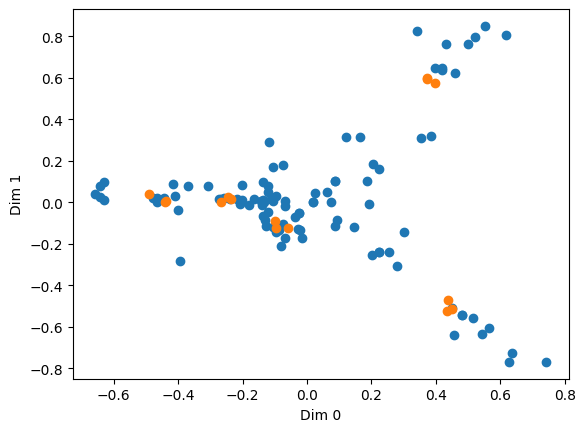

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ca import CA


transfer = CA(n_components=2)

transfer.fit(contingency_table=X)

pcs_row2, pcs_col2 = \
    transfer.get_princpl_coords_df(row_categories=row_names,
                                   col_categories=col_names)
variances = transfer.principal_inertias_
percent_explnd_var = (variances / variances.sum()) * 100

fig, ax = plt.subplots()
plt.scatter(x='Dim 0', y='Dim 1', data=pcs_row2)
plt.scatter(x='Dim 0', y='Dim 1', data=pcs_col2)


#for i in range(ngenes):
#    plt.text(pcs_row2.iloc[i]['Dim 0'], pcs_row2.iloc[i]['Dim 1'], col_names[i], fontsize=6, ha='right', va='bottom', rotation=10)


ax.set_xlabel('Dim 0')
ax.set_ylabel('Dim 1')
plt.show()



In [71]:
pcs_row2.shape

(100, 2)

In [72]:
pcs_row2.shape

(100, 2)

In [73]:
combined_data = np.concatenate((pcs_row2, pcs_col2), axis=0)

/pkg/python-3.10.10-1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


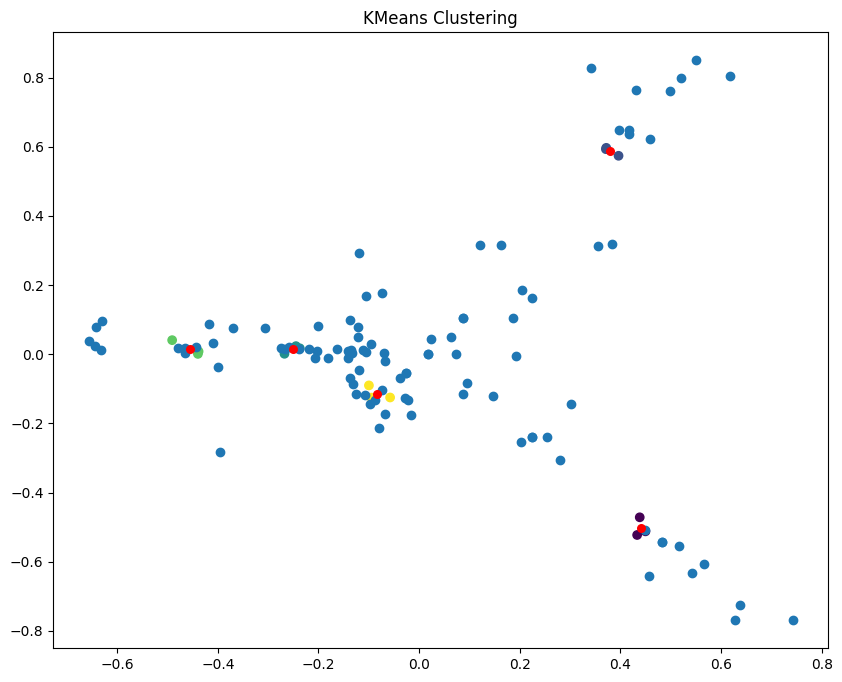

In [74]:
from sklearn.cluster import KMeans
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(pcs_col2)

cluster_labels = kmeans.labels_

plt.figure(figsize=(10, 8))
plt.scatter(x='Dim 0', y='Dim 1', data=pcs_col2, c=cluster_labels)
plt.scatter(x='Dim 0', y='Dim 1', data=pcs_row2)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=30, c='red') 
plt.title('KMeans Clustering')
plt.show()

In [75]:
avg_sample_coord = kmeans.cluster_centers_

In [76]:
avg_sample_coord

array([[ 0.4402804 , -0.50214583],
       [ 0.37961142,  0.58775266],
       [-0.24979675,  0.01387853],
       [-0.4561128 ,  0.01648383],
       [-0.08412502, -0.11362896]])

In [77]:
genes = pcs_col2.values.T

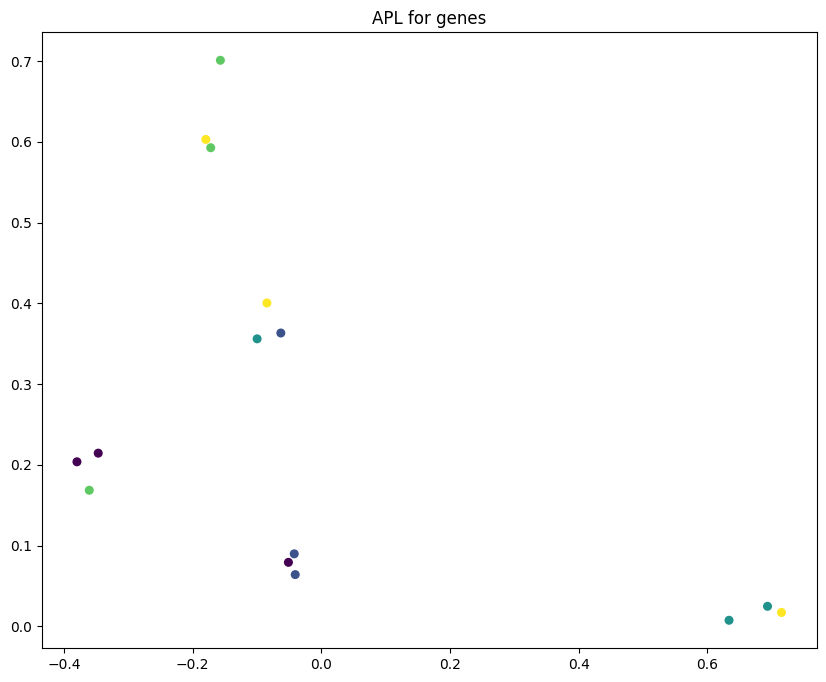

In [78]:
plt.figure(figsize=(10, 8))
plt.scatter(G_coordinates_sincos[0], G_coordinates_sincos[1], s=30, c=cluster_labels) 
plt.title('APL for genes')
plt.show()

In [79]:
samples = pcs_row2.values.T

In [80]:
import numpy as np

def calculate_length_vector_sample(avg_sample_coord, index_cluster):
    length_vector_sample = np.sqrt(np.sum(np.square(avg_sample_coord[index_cluster])))
    return length_vector_sample

def calculate_S_coordinates_sincos(avg_sample_coord, samples, index_cluster):
    num_samples, num_dims = samples.shape

    length_vector_samples = np.sqrt(np.sum(samples**2, axis=0))
    tmp = np.dot(avg_sample_coord[index_cluster], samples)
    
    Sx = tmp / calculate_length_vector_sample(avg_sample_coord, index_cluster)
    Sy = np.sqrt(length_vector_samples**2 - Sx**2)
    
    return Sx, Sy


In [81]:
def calculate_G_coordinates_sincos(avg_sample_coord, genes, index_cluster):
    num_samples, num_dims = samples.shape

    length_vector_genes = np.sqrt(np.sum(genes**2, axis=0))
    tmp = np.dot(avg_sample_coord[index_cluster], genes)
    
    Gx = tmp / calculate_length_vector_sample(avg_sample_coord, index_cluster)
    Gy = np.sqrt(length_vector_genes**2 - Gx**2)
    
    return Sx, Sy

In [82]:
Sx, Sy = calculate_S_coordinates_sincos(avg_sample_coord, samples, index_cluster)
Gx, Gy = calculate_S_coordinates_sincos(avg_sample_coord, genes, index_cluster)

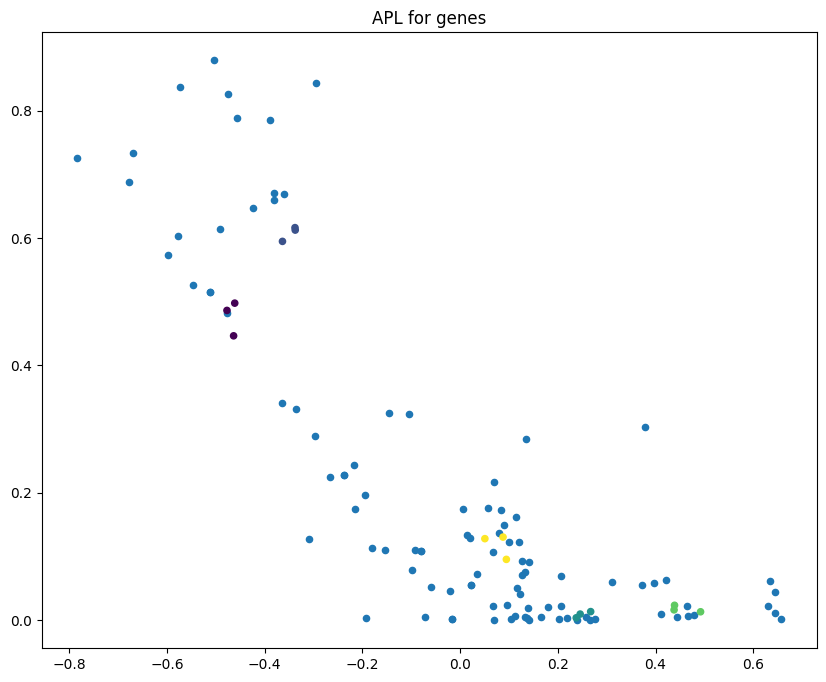

In [83]:
plt.figure(figsize=(10, 8))
plt.scatter(Sx, Sy, s=20)
plt.scatter(Gx, Gy, s=20, c=cluster_labels)
plt.title('APL for genes')
plt.show()